# Data Exploration

In [1]:
df = pd.read_csv('Combat_Data.csv', engine = 'python')
display(df.head())
print(df.columns)

,사료 번호,연대,대대,중대,기타소속,년도,월,일,날짜,지역 분류,지역,일본군수,의병수,일본군사상자,의병사망,한국군사망,특이사항,의병 지휘부
0,사료1,51,NaN,11,NaN,1907.0,8.0,20.0,1907-08-20,경기도,여주,NaN,300,1.0,40,,NaN,NaN
1,사료1,51,2대대,5,아다치 지대,1907.0,8.0,22.0,1907-08-22,충청북도,제천,NaN,불명,NaN,3,NaN,NaN,NaN
2,사료1,51,NaN,2,아다치 지대,1907.0,8.0,22.0,1907-08-22,충청북도,충주,NaN,60,NaN,10,20,NaN,NaN
3,사료1,1,NaN,9,충주수비대,1907.0,8.0,23.0,1907-08-23,충청북도,충주,NaN,200,1.0,26,NaN,NaN,NaN
4,사료1,51,NaN,8,요코에 소대,1907.0,8.0,24.0,1907-08-24,충청북도,단양,NaN,15,NaN,1,NaN,NaN,NaN


Index(['사료 번호', '연대', '대대', '중대', '기타소속', '년도', '월', '일', '날짜', '지역 분류', '지역',
       '일본군수', '의병수', '일본군사상자', '의병사망', '한국군사망', '특이사항', '의병 지휘부'],
      dtype='object')


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

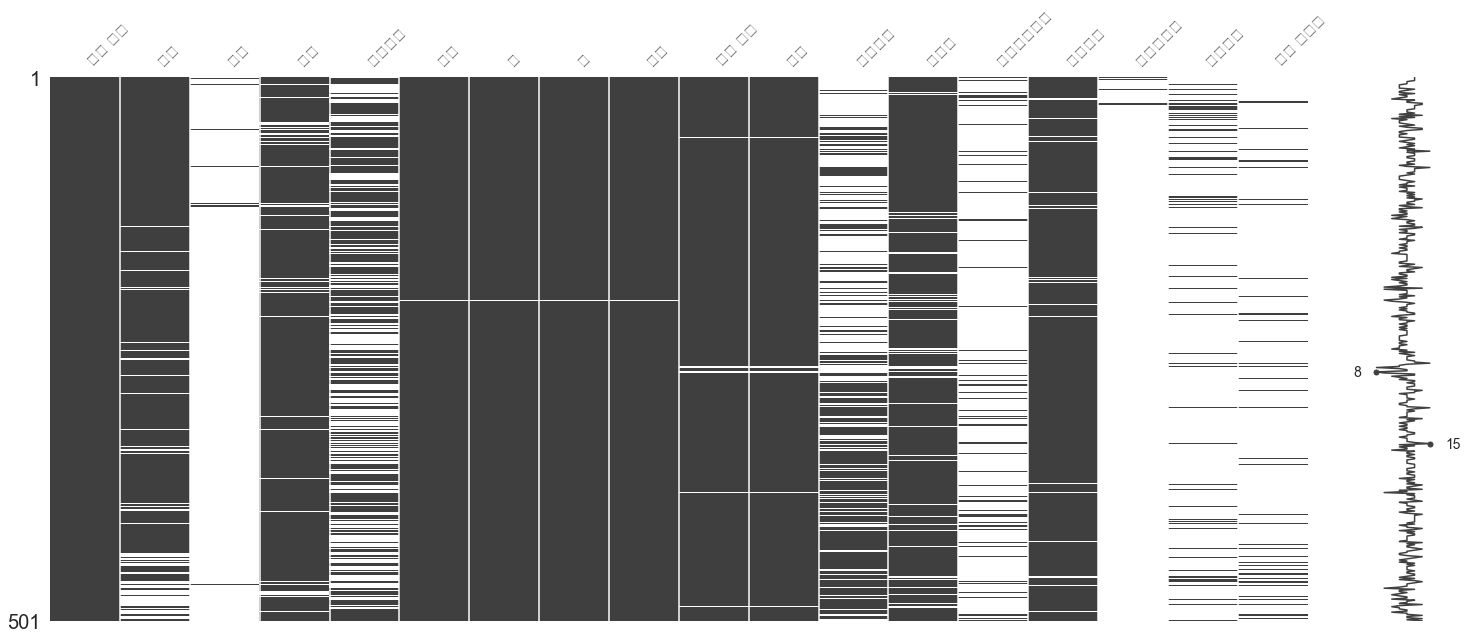

사료 번호       0
연대         59
대대        493
중대         35
기타소속      219
년도          1
월           1
일           1
날짜          1
지역 분류       7
지역          7
일본군수      256
의병수        41
일본군사상자    446
의병사망       19
한국군사망     496
특이사항      443
의병 지휘부    460
dtype: int64


In [2]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(df)
plt.show()

print(df.isnull().sum()) #결측치 확인

# Data Preprocessing

산발적 전투 사건들을 모아놓은 데이터셋이라고 했으니까 소속이, 특이사항(딱히 일반화할만한 특징이 없더라고)drop.
의병지휘부, 한국군 사망도(결측치가 너무 많아서& 딱히 의미 없는 데이터라)은 drop할게
년도, 월, 일도 결국 날짜에 포함되어 있으니 다 drop.

In [3]:
df1 = df.drop(['사료 번호', '연대', '대대', '중대', '기타소속', '특이사항', '의병 지휘부', '한국군사망', '년도', '월', '일', '일본군수'], axis = 1)
df1.tail()

,날짜,지역 분류,지역,의병수,일본군사상자,의병사망
496,1908-05-19,전라북도,순창,50,NaN,9
497,1908-05-19,전라남도,화순,85,NaN,70
498,1908-05-31,전라남도,장성,71,2.0,70
499,1908-06-04,충청북도,봉화,100,NaN,70
500,1908-06-07,충청북도,봉화,150,2.0,48


결측치 값이 너무 많아서 제대로 분석이 될는지 모르겠는데 일단 날짜나 지역 별로 묶어 볼게. 
지역값도 너무 많아서 도별로만 묶어볼거야.

그전에 일단 일본군사상자 및 의병수, 의병사망  Nan값(결측치)은 전부 0으로 채워넣을거야.(Imputation)

In [4]:
df1['일본군사상자'] = df1['일본군사상자'].fillna(0)
df1['의병수'] = df1['의병수'].fillna(0)
df1['의병사망'] = df1['의병사망'].fillna(0)
df1

,날짜,지역 분류,지역,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,여주,300,1.0,40
1,1907-08-22,충청북도,제천,불명,0.0,3
2,1907-08-22,충청북도,충주,60,0.0,10
3,1907-08-23,충청북도,충주,200,1.0,26
4,1907-08-24,충청북도,단양,15,0.0,1
...,...,...,...,...,...,...
496,1908-05-19,전라북도,순창,50,0.0,9
497,1908-05-19,전라남도,화순,85,0.0,70
498,1908-05-31,전라남도,장성,71,2.0,70
499,1908-06-04,충청북도,봉화,100,0.0,70


In [5]:
df1 = df1.drop('지역', axis = 1)
df1

,날짜,지역 분류,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,300,1.0,40
1,1907-08-22,충청북도,불명,0.0,3
2,1907-08-22,충청북도,60,0.0,10
3,1907-08-23,충청북도,200,1.0,26
4,1907-08-24,충청북도,15,0.0,1
...,...,...,...,...,...
496,1908-05-19,전라북도,50,0.0,9
497,1908-05-19,전라남도,85,0.0,70
498,1908-05-31,전라남도,71,2.0,70
499,1908-06-04,충청북도,100,0.0,70


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

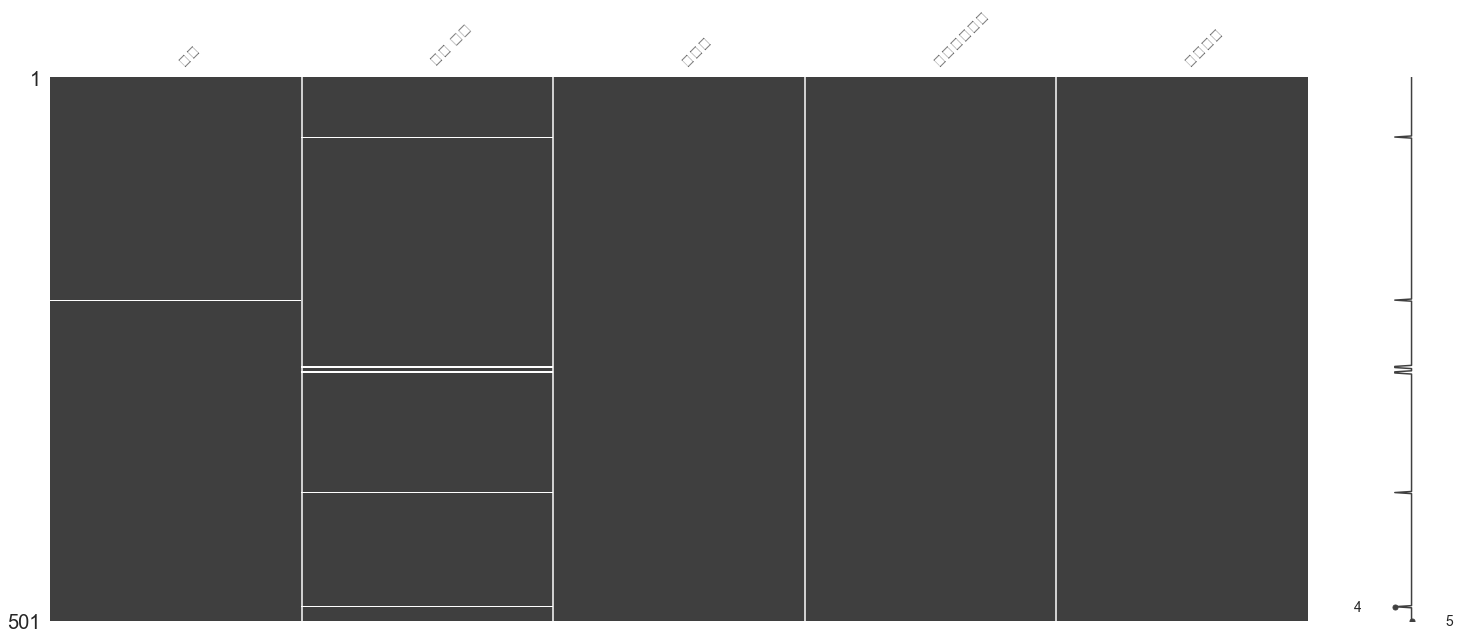

날짜        1
지역 분류     7
의병수       0
일본군사상자    0
의병사망      0
dtype: int64


In [6]:
import missingno as msno
#checking if there's any empty values on the chart.

msno.matrix(df1)
plt.show()

print(df1.isnull().sum()) #결측치 확인

여전히 지역분류, 날짜에는 na값이 있어서 이건 쓸모없는 값이라고 간주하고 행을 drop할거야.
지금까지 전처리한 결과를 보면 결국 지역이나 날짜에 따른 추이만 볼 수 있을거 같은데 결측치가 있으면 분석이 안 되거든.


In [7]:
df1.dropna(axis = 0, how = 'any' ,inplace = True)
df1

,날짜,지역 분류,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,300,1.0,40
1,1907-08-22,충청북도,불명,0.0,3
2,1907-08-22,충청북도,60,0.0,10
3,1907-08-23,충청북도,200,1.0,26
4,1907-08-24,충청북도,15,0.0,1
...,...,...,...,...,...
496,1908-05-19,전라북도,50,0.0,9
497,1908-05-19,전라남도,85,0.0,70
498,1908-05-31,전라남도,71,2.0,70
499,1908-06-04,충청북도,100,0.0,70


In [8]:
df2 = df1['의병수'] == '불명'
df2.sum() #'의병수'가 불명인 값은 3개인데 역사적 사실을 왜곡할 수 없으니까(mean 값으로 채워넣는다던가) 이것도 drop

3

In [36]:
not_string = df1['의병수'] != '불명'
df_final = df1[not_string]
df_final

,날짜,지역 분류,의병수,일본군사상자,의병사망
0,1907-08-20,경기도,300,1.0,40
2,1907-08-22,충청북도,60,0.0,10
3,1907-08-23,충청북도,200,1.0,26
4,1907-08-24,충청북도,15,0.0,1
5,1907-08-26,경기도,70,0.0,20
...,...,...,...,...,...
496,1908-05-19,전라북도,50,0.0,9
497,1908-05-19,전라남도,85,0.0,70
498,1908-05-31,전라남도,71,2.0,70
499,1908-06-04,충청북도,100,0.0,70


# Data Analysis

In [37]:
df_date = df_final.drop('지역 분류', axis = 1)
df_region = df_final.drop('날짜', axis = 1)

df_date = df_date.set_index("날짜")
df_region = df_region.set_index("지역 분류")

display(df_date)
display(df_region)

,의병수,일본군사상자,의병사망
날짜,,,
1907-08-20,300,1.0,40
1907-08-22,60,0.0,10
1907-08-23,200,1.0,26
1907-08-24,15,0.0,1
1907-08-26,70,0.0,20
...,...,...,...
1908-05-19,50,0.0,9
1908-05-19,85,0.0,70
1908-05-31,71,2.0,70


,의병수,일본군사상자,의병사망
지역 분류,,,
경기도,300,1.0,40
충청북도,60,0.0,10
충청북도,200,1.0,26
충청북도,15,0.0,1
경기도,70,0.0,20
...,...,...,...
전라북도,50,0.0,9
전라남도,85,0.0,70
전라남도,71,2.0,70


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\ma

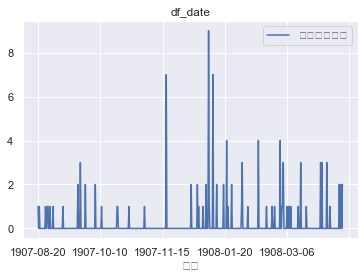

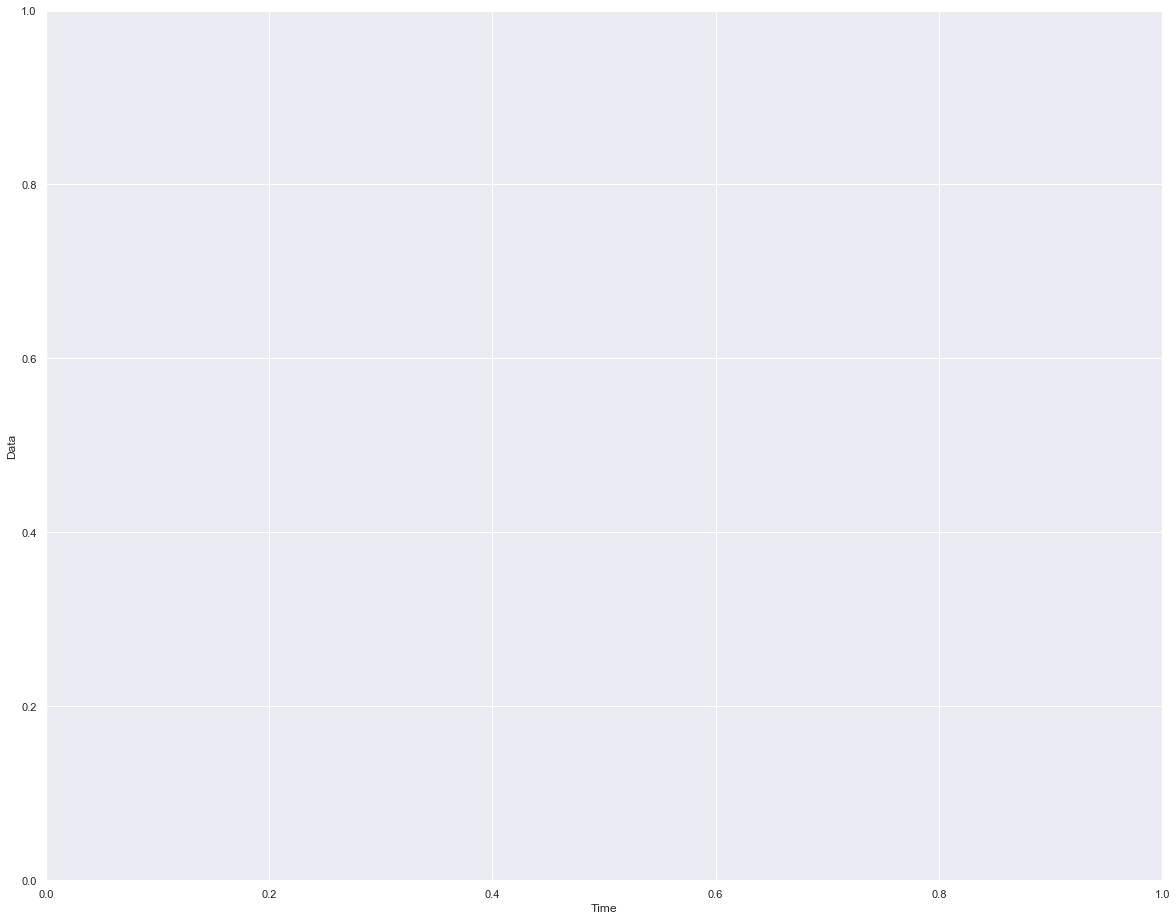

In [11]:
df_date.plot()
plt.title("df_date")
plt.figure(figsize = [20, 16])
plt.xlabel("Time")
plt.ylabel("Data")
plt.show()

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

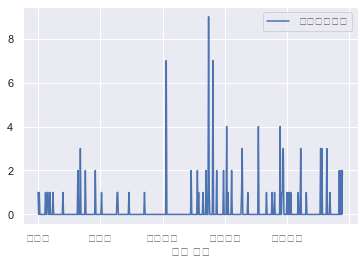

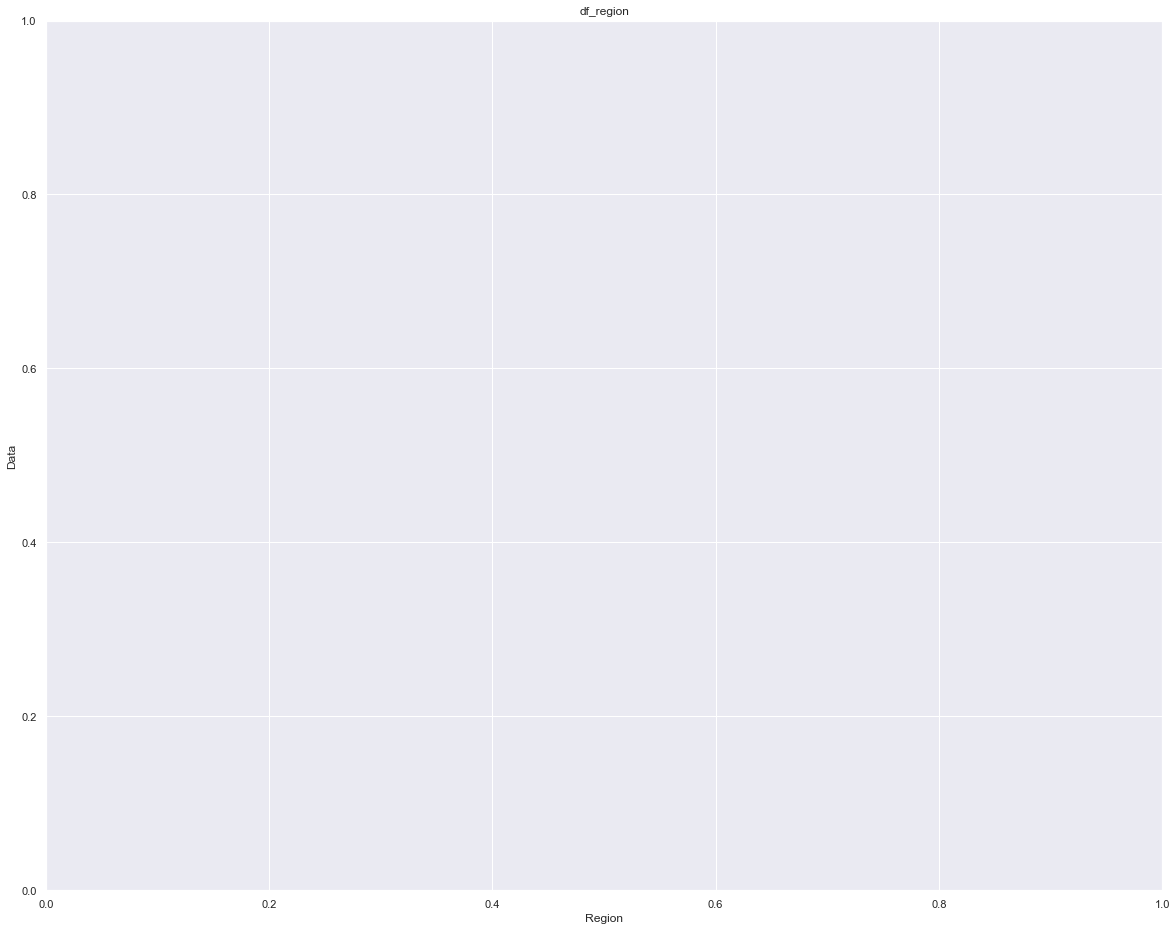

In [12]:
df_region.plot()
plt.figure(figsize = [20, 16])
plt.title("df_region")
plt.xlabel("Region")
plt.ylabel("Data")
plt.show()

In [33]:
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'Arial',
 'Bahnschrift',
 'Batang',
 'Calibri',
 'Cambria',
 'Candara',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'HoloLens MDL2 Assets',
 'HyhwpEQ',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MBatang',
 'MDotum',
 'MGungHeulim',
 'MGungJeong',
 'MHunmin',
 'MJemokBatang',
 'MJemokGothic',
 'MS Gothic',
 'MSugiHeulim',
 'MSugiJeong',
 'MV Boli',
 'Malgun Gothic',
 'Marlett',
 'Microsoft Himalaya',
 'Microsoft JhengHei',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft YaHei',
 'Microsoft Yi Baiti',
 'MingLiU-ExtB',
 'Mongolian Baiti',
 'Myanmar Text',
 'NewJumja',
 'Ni

In [23]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.3
설치 위치:  D:\anaconda\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\User\.matplotlib
캐시 위치:  C:\Users\User\.matplotlib


In [17]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  D:\anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [34]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

189


In [35]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]